In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = pd.read_csv("student_placement_dataset_1000.csv")
dataset.head(3)

,cgpa,score,placed
0,6.69,5.43,0
1,9.28,7.21,1
2,8.29,8.86,1


In [3]:
x = dataset.iloc[:,:-1]
y = dataset["placed"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
lr.score(x_test, y_test)*100

90.5

lr.score = 90.5%

## Confusion Matrix ##

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [10]:
confusion_matrix(y_test, lr.predict(x_test))

array([[134,   7],
       [ 12,  47]])

# 1. y_test → Original / Actual output

This is the true result from your dataset.

Example:

y_test = [1, 0, 1, 1, 0]


Meaning:

1 → student placed

0 → student not placed

These are the correct labels, known only for testing.

# 2. lr.predict(x_test) → Predicted output

This is what your Logistic Regression model thinks.

Example:

lr.predict(x_test) = [1, 0, 0, 1, 1]


These are the model’s predictions based on CGPA & score.

# 3. confusion_matrix(actual, predicted)

So internally, Python reads it like this 👇

confusion_matrix(
    actual_values = y_test,
    predicted_values = lr.predict(x_test)
)

In [11]:
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[134,   7],
       [ 12,  47]])

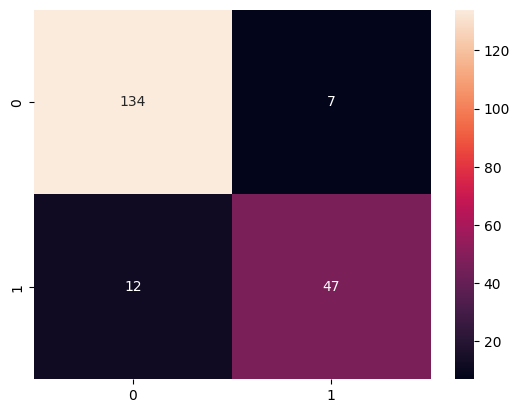

In [12]:
# sns.heatmap(cf, annot = True)
# plt.show()

sns.heatmap(cf, annot=True, fmt="d")
plt.show()


fmt stands for format.

fmt tells Python HOW to display the numbers written on the heatmap.

"d"	Integer (whole number)

In [13]:
precision_score(y_test, lr.predict(x_test))

0.8703703703703703

In [14]:
precision_score(y_test, lr.predict(x_test))*100

87.03703703703704

precision_score = 87.03%

ued for FP

In [15]:
recall_score(y_test, lr.predict(x_test))*100

79.66101694915254

recall_score = 79.66%

used for FN


In [16]:
f1_score(y_test, lr.predict(x_test))*100

83.1858407079646

f1_score = 83.18%

used for both FP & FN

Precision, recall, and F1 score differ because they focus on different error types. I choose F1 score when I need a balanced model that handles both false positives and false negatives effectively.

Precision  = False positives are costly

Example: “Telling a student they are placed when they are NOT”

Recall = Missing a positive case is costly

Example: “A placed student wrongly marked as not placed”

F1 Score = Not falsely promising placement ❌

Not missing placed students ❌

Both FP & FN matter